In [1]:
!git clone https://github.com/Sauhardya/track_dataset

fatal: destination path 'track_dataset' already exists and is not an empty directory.


In [2]:
import ntpath
from sklearn.utils import shuffle
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
from imgaug import augmenters as iaa

In [3]:
datadir="track_dataset"

In [4]:
columns=['center','left','right','steering','throttle','reverse','speed']
#joining the folder IMG with csv file together and giving names to the columns of csv file.
data=pd.read_csv(os.path.join(datadir,"driving_log.csv"), names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

center  \
0  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\center_2020_03_14_10_55_02_950.jpg   
1  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\center_2020_03_14_10_55_03_055.jpg   
2  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\center_2020_03_14_10_55_03_122.jpg   
3  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\center_2020_03_14_10_55_03_202.jpg   
4  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\center_2020_03_14_10_55_03_273.jpg   

                                                                                                            left  \
0  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\left_2020_03_14_10_55_02_950.jpg   
1  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\left_2020_03_14_10_55_03_055.jpg   
2  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\left_2020_03_14_10_55_03_122.jpg   
3  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\left_2020_03_14_10_55_03_202.jpg   
4  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\left_2020_03_14_10_55_03_273.jpg   

                                                                                                            right  \
0  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\right_2020_03_14_10_55_02_950.jpg   
1  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\right_2020_03_14_10_55_03_055.jpg   
2  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\right_2020_03_14_10_55_03_122.jpg   
3  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\right_2020_03_14_10_55_03_202.jpg   
4  E:\Important\Self_Driving_Car_Project\Virtual(Udacity Simulator)\Dataset\IMG\right_2020_03_14_10_55_03_273.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000009  
1  0.0       0.0       0.0      0.000001  
2  0.0       0.0       0.0      0.000006  
3  0.0       0.0       0.0      0.000003  
4  0.0       0.0       0.0      0.000014

In [5]:
#removing the path source from the names of the images.
#ntpath is used for that.
def path_correction(path):
  head,tail=ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_correction)
data['left']=data['left'].apply(path_correction)
data['right']=data['right'].apply(path_correction)
data.head()

center                              left  \
0  center_2020_03_14_10_55_02_950.jpg  left_2020_03_14_10_55_02_950.jpg   
1  center_2020_03_14_10_55_03_055.jpg  left_2020_03_14_10_55_03_055.jpg   
2  center_2020_03_14_10_55_03_122.jpg  left_2020_03_14_10_55_03_122.jpg   
3  center_2020_03_14_10_55_03_202.jpg  left_2020_03_14_10_55_03_202.jpg   
4  center_2020_03_14_10_55_03_273.jpg  left_2020_03_14_10_55_03_273.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2020_03_14_10_55_02_950.jpg  0.0       0.0       0.0      0.000009  
1  right_2020_03_14_10_55_03_055.jpg  0.0       0.0       0.0      0.000001  
2  right_2020_03_14_10_55_03_122.jpg  0.0       0.0       0.0      0.000006  
3  right_2020_03_14_10_55_03_202.jpg  0.0       0.0       0.0      0.000003  
4  right_2020_03_14_10_55_03_273.jpg  0.0       0.0       0.0      0.000014

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


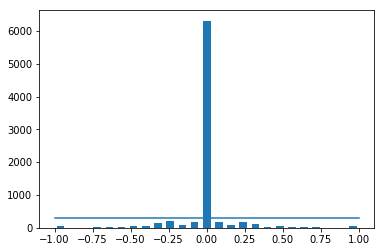

In [6]:
#plotting a histogram for steering angle of every image 
num_bins=25
sample_per_bin=300
hist, bins=np.histogram(data['steering'],num_bins)
print(bins)
center=(bins[: -1]+bins[1:])*0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(sample_per_bin,sample_per_bin))
print(center)


removed 6009
remaining 1914


TypeError: cannot perform reduce with flexible type

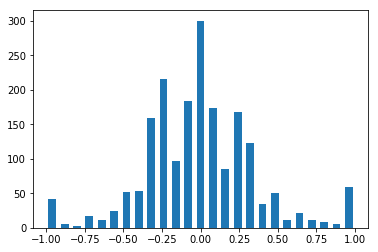

In [7]:
#preprocessing of dataset
"""
space for explaining the process, 
RESERVED!
 """
remove_list=[]
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
     if data['steering'][i]>=bins[j] and data['steering'][i]<=bins[j+1]:
       list_.append(i)
  list_=shuffle(list_)
  list_=list_[sample_per_bin:]
  remove_list.extend(list_) 

    
print('removed', len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print('remaining',len(data))

hist,_=np.histogram(data['steering'], (num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(['steering'])), (sample_per_bin,sample_per_bin))
#   !!!NOTICE!!!
#Down from this cell, Documentation to be done!!!


print(data.iloc[1])

In [9]:
def load_img_steering(datadir,df):
  image_path=[]
  steering=[]
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    center,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.asarray(image_path)
  steerings=np.asarray(steering)
  return image_paths,steerings

image_paths,steerings=load_img_steering(datadir + '/IMG', data)


track_dataset/IMG\center_2020_03_14_11_00_56_746.jpg
Training Samples 1531 
Valid Samples 383


Text(0.5, 1.0, 'Testing Set')

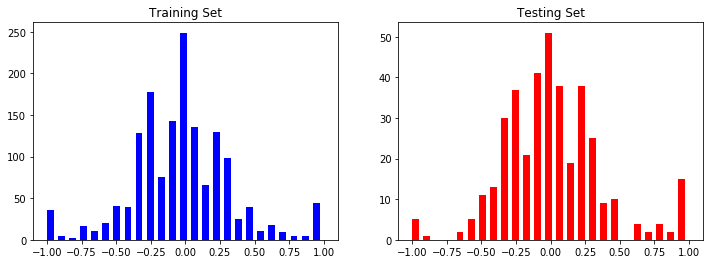

In [10]:
X_train, X_test, y_train, y_test=train_test_split(image_paths,steerings,test_size=0.2,random_state=6)
print(X_train[18])

print('Training Samples {} \nValid Samples {}'.format(len(X_train),len(X_test)))

fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('Training Set')
axes[1].hist(y_test,bins=num_bins,width=0.05,color='red')
axes[1].set_title('Testing Set')

In [11]:
def zoom(image):
    zoom=iaa.Affine(scale=(1,1.4))
    image=zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'Zoomed Image')

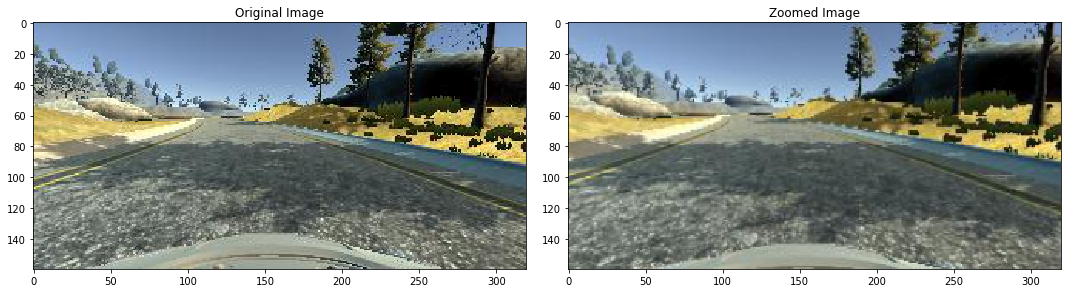

In [12]:
image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)
zoomed_image=zoom(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(zoomed_image)
axes[1].set_title('Zoomed Image')


In [13]:
def panning(image):
    pan=iaa.Affine(translate_percent={'x': (-0.1,0.1),'y': (-0.1,0.1)})
    image=pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

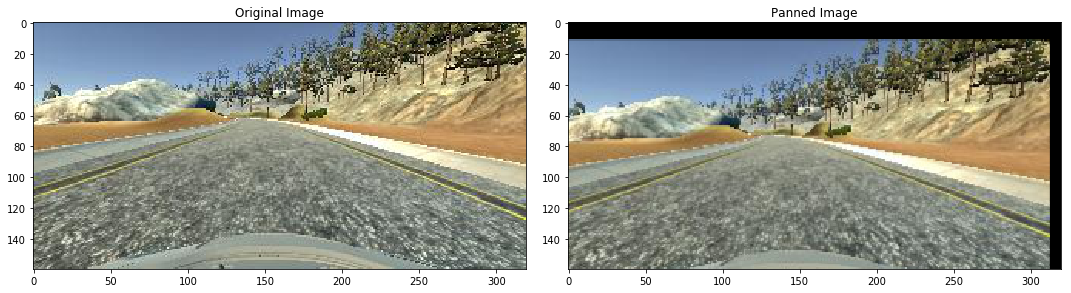

In [14]:
image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)
translated_image=panning(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(translated_image)
axes[1].set_title('Panned Image')

In [15]:
def image_random_brightness(image):
    brightness=iaa.Multiply((0.2,1.2))
    image=brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Random Brightness Image')

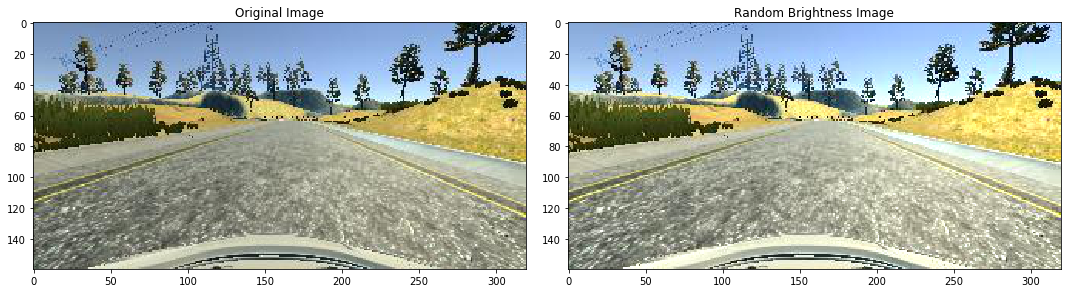

In [16]:
image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)
brightness_altered_image=image_random_brightness(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(brightness_altered_image)
axes[1].set_title('Random Brightness Image')

In [17]:
def random_image_flip(image,steering_angle):
    image=cv2.flip(image,1)
    flipped_steerings=-steering_angle
    return image, flipped_steerings

Text(0.5, 1.0, 'Flipped Image0.4')

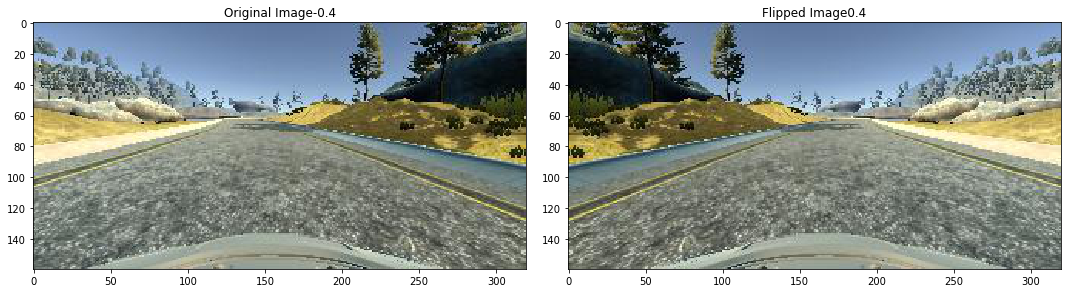

In [18]:
random_index=random.randint(0,1000)
random_image=image_paths[random_index]
random_angle=steerings[random_index]

original_image=mpimg.imread(random_image)
flipped_image,flipped_steering_angle=random_image_flip(original_image,random_angle)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image'+str(random_angle))
axes[1].imshow(flipped_image)
axes[1].set_title('Flipped Image'+str(flipped_steering_angle))

In [19]:
def random_augment(image,steering_angle):
    image=mpimg.imread(image)
    if np.random.rand() < 0.5:
        image=panning(image)
    if np.random.rand() < 0.5:
        image=image_random_brightness(image)
    if np.random.rand() < 0.5:
        image,steering_angle=random_image_flip(image, steering_angle)
    if np.random.rand() < 0.5:
        image=zoom(image)
    return image,steering_angle

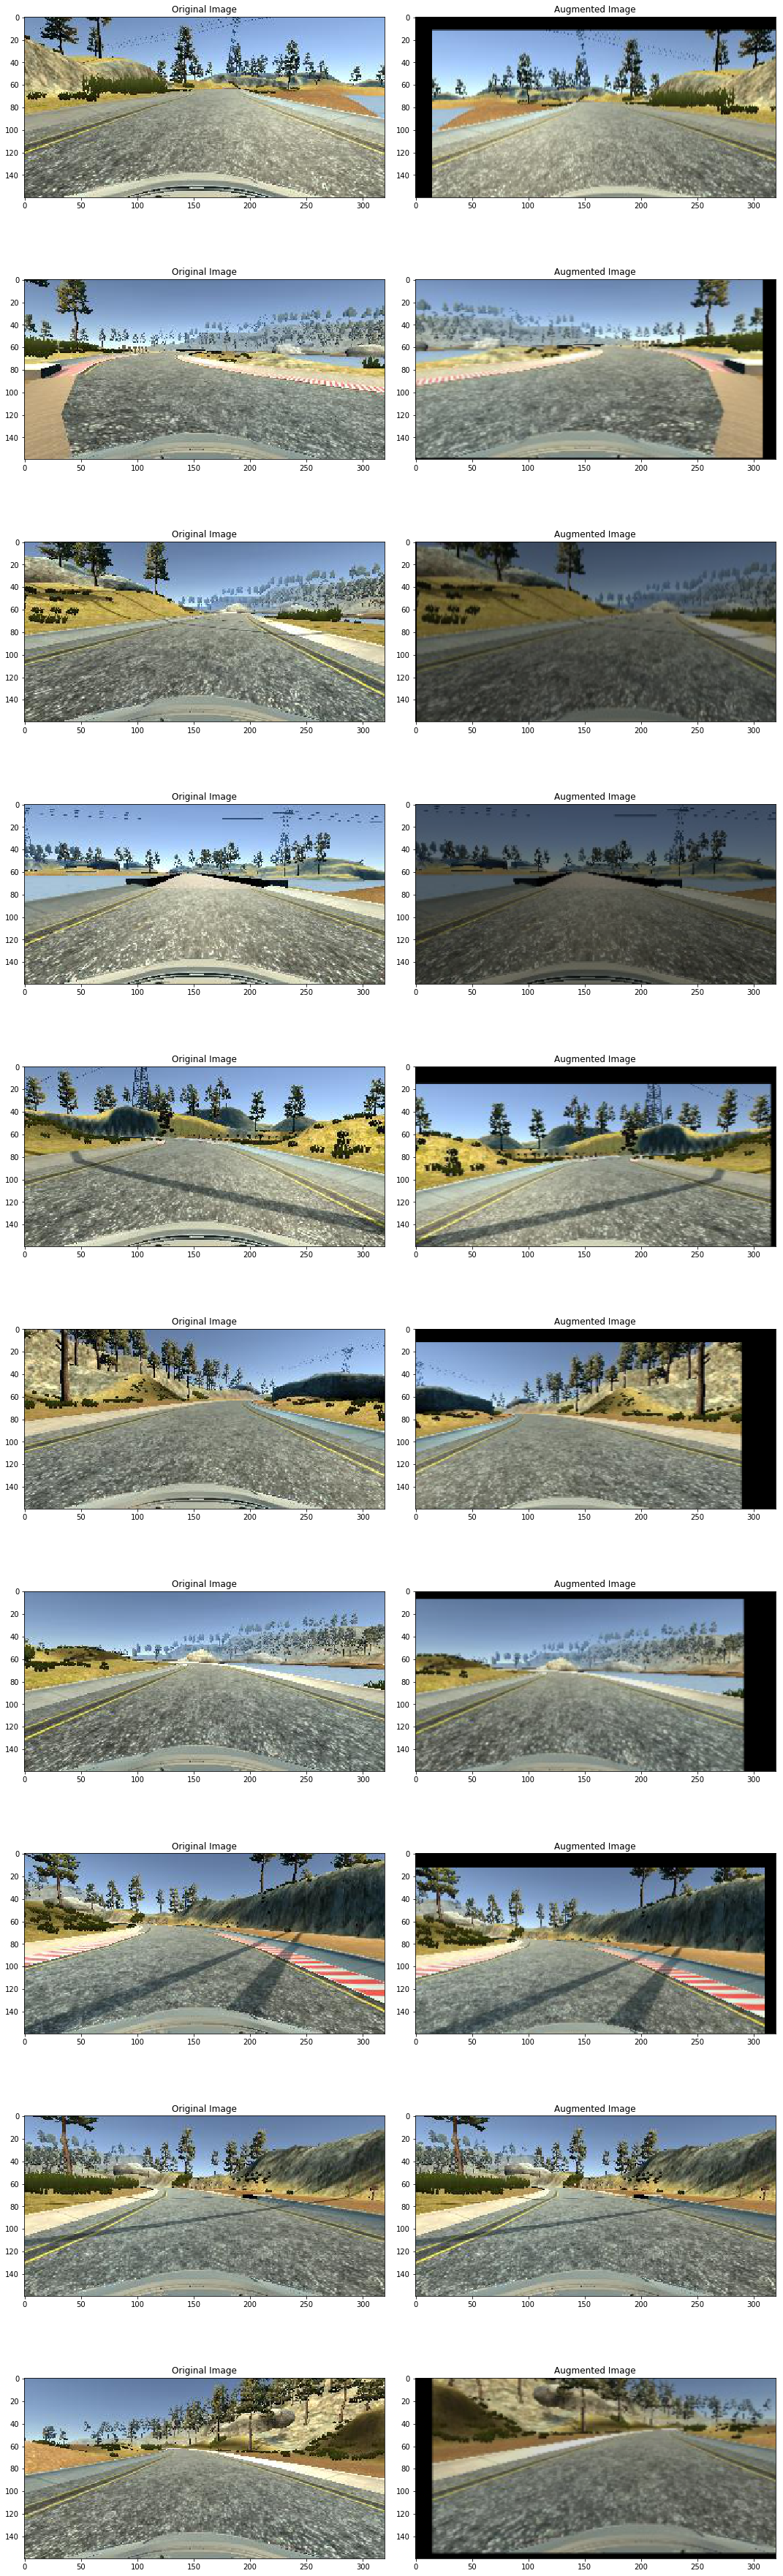

In [20]:
ncol=2
nrow=10

fig,axes=plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()

for i in range(10):
    randnum=random.randint(0, len(image_paths)-1)
    
    random_image=image_paths[randnum]
    random_steering=steerings[randnum]
    
    original_image=mpimg.imread(random_image)
    augment_image,steering=random_augment(random_image,random_steering)
    
    axes[i][0].imshow(original_image)
    axes[i][0].set_title('Original Image')
    axes[i][1].imshow(augment_image)
    axes[i][1].set_title('Augmented Image')
    

Text(0.5, 1.0, 'Preprocessed Image')

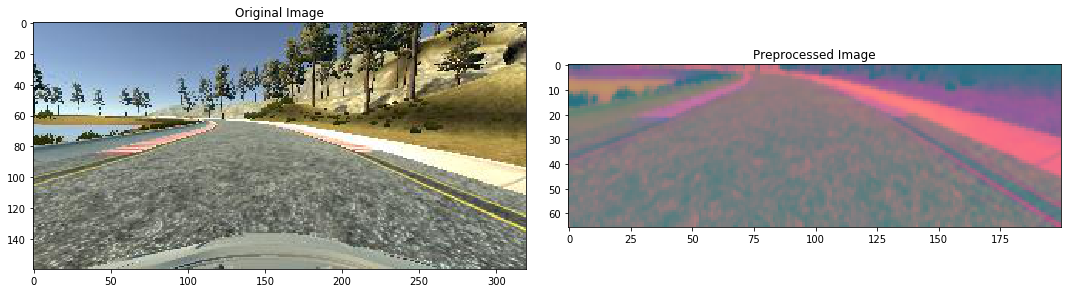

In [21]:
def img_preprocess(img):
    img=img[60:135,:,:]
    img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img=cv2.GaussianBlur(img,(3,3),0)
    img=cv2.resize(img,(200,66))
    img=img/255 #normalization
    return img

image=image_paths[100]
original_image= mpimg.imread(image)
preprocessed_image=img_preprocess(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,20))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')



In [22]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
        random_index = random.randint(0, len(image_paths) - 1)
      
        if istraining:
            im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
        else:
            im = mpimg.imread(image_paths[random_index])
            steering = steering_ang[random_index]
      
        im = img_preprocess(im)
        batch_img.append(im)
        batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Testing Image')

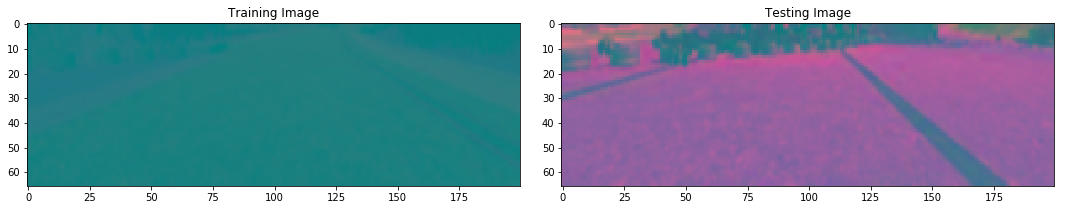

In [23]:
x_train_gen,y_train_gen=next(batch_generator(X_train,y_train,1,1))
x_test_gen,y_test_gen=next(batch_generator(X_test,y_test,1,0))


fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(x_train_gen[0])
axes[0].set_title('Training Image')
axes[1].imshow(x_test_gen[0])
axes[1].set_title('Testing Image')

In [24]:
#X_train = np.array(list(map(img_preprocess, X_train)))
#X_test=np.array(list(map(img_preprocess, X_test)))

In [25]:
#plt.imshow(X_train[random.randint(0,len(X_train-1))])
#print(X_train.shape)

In [33]:
def nvidia_model():
    
    model=Sequential()
    model.add(Convolution2D(24,5,5,subsample=(2,2),input_shape=(66,200,3),activation='elu'))
    model.add(Convolution2D(36,5,5,subsample=(2,2),activation='elu'))
    model.add(Convolution2D(48,5,5,subsample=(2,2),activation='elu'))
    model.add(Convolution2D(64,3,3,activation='elu'))
    model.add(Convolution2D(64,3,3,activation='elu'))
    #model.add(Dropout(0.5))
    
    
    
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    #model.add(Dropout(0.5))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    optimizer=Adam(lr=1e-4)
    model.compile(loss='mse',optimizer=optimizer)
    """
    
    model = Sequential()
    model.add(Convolution2D(16, 3, 3, input_shape=(66, 200, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=1e-04), loss='mean_squared_error')
    """
    return model


In [34]:
model=nvidia_model()
print(model.summary())

C:\Users\ssrev\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
C:\Users\ssrev\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  """
C:\Users\ssrev\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  
C:\Users\ssrev\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  import sys
C:\Users\ssrev\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

In [35]:
train=model.fit_generator(batch_generator(X_train,y_train,100,1),steps_per_epoch=300,epochs=10,validation_data=batch_generator(X_train,y_train,100,0),validation_steps=200,verbose=1,shuffle=1)

Epoch 1/10
300/300 [==============================] - 238s 792ms/step - loss: 0.1140 - val_loss: 0.0636
Epoch 2/10
300/300 [==============================] - 279s 931ms/step - loss: 0.1002 - val_loss: 0.0766
Epoch 3/10
300/300 [==============================] - 265s 884ms/step - loss: 0.0927 - val_loss: 0.0929
Epoch 4/10
300/300 [==============================] - 248s 828ms/step - loss: 0.0923 - val_loss: 0.0992
Epoch 5/10
300/300 [==============================] - 240s 801ms/step - loss: 0.0816 - val_loss: 0.0584
Epoch 6/10
300/300 [==============================] - 260s 866ms/step - loss: 0.0758 - val_loss: 0.0394
Epoch 7/10
300/300 [==============================] - 241s 804ms/step - loss: 0.0705 - val_loss: 0.0400
Epoch 8/10
300/300 [==============================] - 256s 854ms/step - loss: 0.0663 - val_loss: 0.0395
Epoch 9/10
300/300 [==============================] - 258s 858ms/step - loss: 0.0609 - val_loss: 0.0460
Epoch 10/10
300/300 [==============================] - 263s 876m

Text(0.5, 1.0, 'loss')

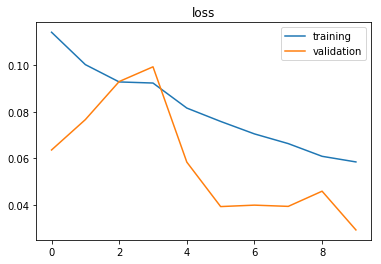

In [36]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')

In [38]:
model.save('model.h5')